In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(34)

In [2]:
# load the data
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

# N - Training sample | D - Feature Dimension
N, D = X_train.shape

N,D

(381, 30)

In [4]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Convert data into torch tensors

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

# torch expects output shape to be N X D 

y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [6]:
# build the model using sigmoid layer
model = nn.Sequential(nn.Linear(D,1,),
                      nn.Sigmoid())

# define loss
criterion = nn.BCELoss()

# define optimizer
optimizer = torch.optim.Adam(model.parameters())

In [7]:
# Training Loop

n_epochs = 200

# init train and test losses
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for i in range(n_epochs):

    # zero the gradients
    optimizer.zero_grad()

    # Forward Pass
    outputs = model(X_train)

    # Compute Loss
    loss = criterion(outputs, y_train)

    # Backward Propogation
    loss.backward()

    # Optimize model
    optimizer.step()

    # compute test loss
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)
    
    # Save losses
    train_losses[i] = loss.item()
    test_losses[i] = loss_test.item()

    if (i + 1) % 20 == 0:
        print(f'Epoch {i+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 20/200, Train Loss: 0.5501, Test Loss: 0.5719
Epoch 40/200, Train Loss: 0.4641, Test Loss: 0.4763
Epoch 60/200, Train Loss: 0.4038, Test Loss: 0.4092
Epoch 80/200, Train Loss: 0.3600, Test Loss: 0.3607
Epoch 100/200, Train Loss: 0.3268, Test Loss: 0.3237
Epoch 120/200, Train Loss: 0.3006, Test Loss: 0.2944
Epoch 140/200, Train Loss: 0.2791, Test Loss: 0.2703
Epoch 160/200, Train Loss: 0.2613, Test Loss: 0.2501
Epoch 180/200, Train Loss: 0.2461, Test Loss: 0.2329
Epoch 200/200, Train Loss: 0.2331, Test Loss: 0.2179


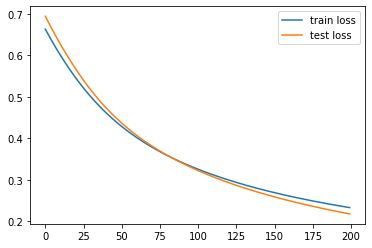

In [8]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [9]:
# check accuracy

# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  
  # convert probablites to binary output
  p_train = np.round(p_train.numpy())
  
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9449, Test acc: 0.9415


In [10]:
# model dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2218, -0.1881, -0.1099, -0.0223, -0.2271,  0.0310, -0.0845, -0.1892,
                       -0.2277,  0.3466, -0.0797, -0.2010,  0.0393,  0.0052,  0.1878, -0.0902,
                       -0.1703, -0.1812,  0.1333,  0.1142, -0.0621, -0.0175, -0.2954, -0.2662,
                       -0.0382, -0.1486, -0.0101, -0.2938, -0.2075, -0.2660]])),
             ('0.bias', tensor([0.2613]))])

In [11]:
# save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [12]:
# load Model
model2 = nn.Sequential(nn.Linear(D, 1),
                       nn.Sigmoid())

model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [13]:
# test loaded model
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9449, Test acc: 0.9415


In [14]:
# Train the model using BCEwith Logit Loss
model = nn.Linear(D, 1)

# Loss - Combines BCE Loss with sigmoid step into single class
criterion = nn.BCEWithLogitsLoss()

# optimizer
optimizer = torch.optim.Adam(model.parameters())

In [15]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_acc = np.zeros(n_epochs)
test_acc = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
    
  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.3359, Test Loss: 0.3118
Epoch 100/1000, Train Loss: 0.2632, Test Loss: 0.2393
Epoch 150/1000, Train Loss: 0.2218, Test Loss: 0.1959
Epoch 200/1000, Train Loss: 0.1945, Test Loss: 0.1662
Epoch 250/1000, Train Loss: 0.1751, Test Loss: 0.1447
Epoch 300/1000, Train Loss: 0.1606, Test Loss: 0.1285
Epoch 350/1000, Train Loss: 0.1493, Test Loss: 0.1160
Epoch 400/1000, Train Loss: 0.1403, Test Loss: 0.1061
Epoch 450/1000, Train Loss: 0.1329, Test Loss: 0.0981
Epoch 500/1000, Train Loss: 0.1268, Test Loss: 0.0914
Epoch 550/1000, Train Loss: 0.1216, Test Loss: 0.0858
Epoch 600/1000, Train Loss: 0.1171, Test Loss: 0.0810
Epoch 650/1000, Train Loss: 0.1132, Test Loss: 0.0768
Epoch 700/1000, Train Loss: 0.1098, Test Loss: 0.0732
Epoch 750/1000, Train Loss: 0.1067, Test Loss: 0.0700
Epoch 800/1000, Train Loss: 0.1040, Test Loss: 0.0672
Epoch 850/1000, Train Loss: 0.1016, Test Loss: 0.0646
Epoch 900/1000, Train Loss: 0.0994, Test Loss: 0.0623
Epoch 950/1000, Train Loss: 0